# KC HOUSING PRICE PREDICTION

**Steps in Handling the Problem**

1. Look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## PROBLEM STATEMENT
The goal of this project is to develop a machine learning model that can accurately predict the price of houses based on several features such as the number of rooms, location, area, age, etc. We will be using a dataset containing housing information to train and test our machine learning models. Once we have developed and evaluated our models, we will create a Python Flask API to capture new observations and use our trained model to predict the housing price.

**Dataset:**
We will be using King County housing dataset that contains information about houses in different locations. The dataset contains various features such as the number of rooms, location, area, age, etc. along with the price of the house. The dataset will be split into training and testing sets to train and evaluate our machine learning models.

**Approach:**
We will start by performing exploratory data analysis (EDA) to gain insights into the dataset and understand the relationship between the features and the target variable. We will then preprocess the data by handling missing values, encoding categorical variables, and scaling the features.

Next, we will develop machine learning models using different algorithms such as linear regression, decision tree, random forest, and gradient boosting. We will evaluate the performance of our models using various metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared.

Once we have developed and evaluated our models, we will create a Python Flask API that captures new observations (features) from users and returns the predicted housing price using our trained model. We will also deploy our API on a cloud platform such as Heroku to make it accessible to users.

## DATA
**About Dataset**

The dataset for this project originates from the UCI Machine Learning Repository. 
The dataset contains 21597x21 data fields. Column names are self-explanatory.

**Inspiration**

- What are the busiest times of the year to visit Kansas? By how much do prices spike?
- Is there a general upward trend of prices and on what factors contribute the most?
- Exploratory Data Analysis
- Price analysis by area based on Lat and Long it

**Variables description**

1. id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartment interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Explore and visualize the data to gain insights.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# information about the data; count, missing values, data type, column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

All columns are numeric except date and sqft_basement which are of object type.

waterfront, view and yr_renovated contain missing values.

In [4]:
# check sqft_basement
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

It looks like the values of sqft_basement are numeric, so we have to convert it to numeric

In [5]:
# convert data to date type and sqft_basement to float
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

df['sqft_basement'] = df['sqft_basement'].replace('[^0-9\.]+', np.nan, regex=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
# summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:

# Check missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

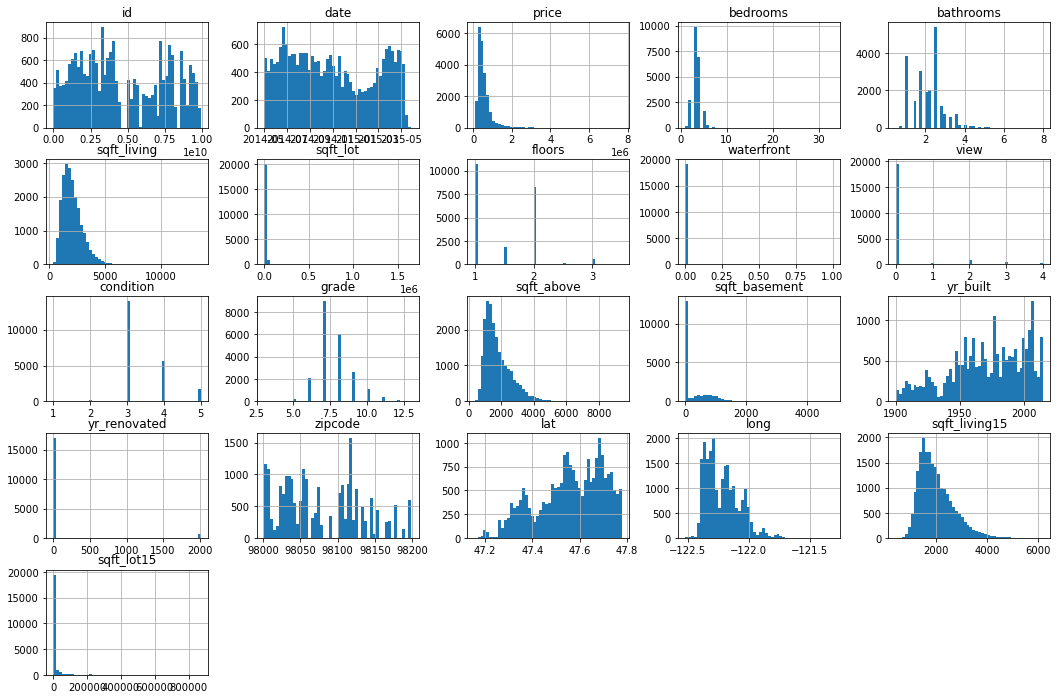

In [8]:
df.hist(bins=50, figsize=(18,12))
plt.show()

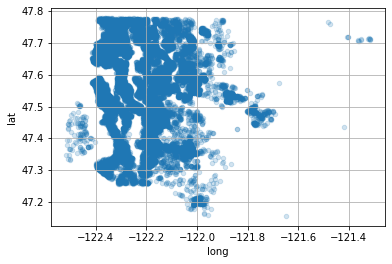

In [9]:
# visualizing geographical information
df.plot(kind="scatter", x="long", y="lat", grid=True, alpha=0.2)
plt.show()

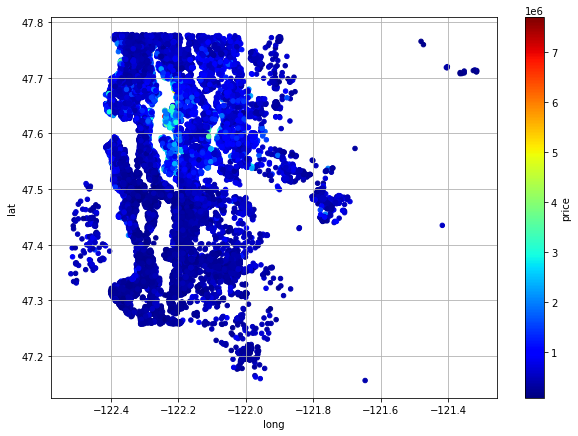

In [10]:
# relationship between location and housing price
df.plot(kind="scatter", x="long", y="lat", grid=True, 
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

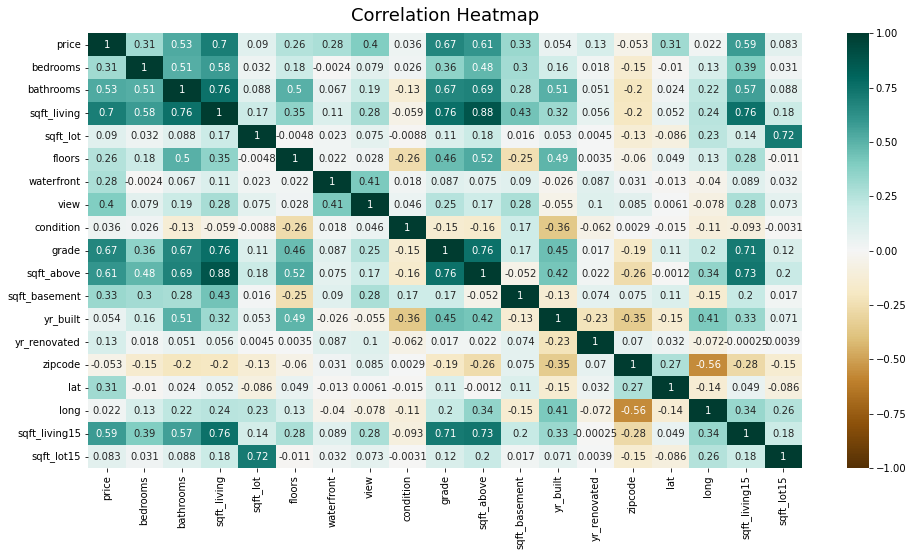

In [11]:
# drop id and date column since we are not using them in model creation
df = df.drop(['id', 'date'], axis=1)

# correlation of varaiables
corr_matrix = df.corr()

#plot
plt.figure(figsize=(16, 8))
heatmap = sb.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
#corr_matrix["median_house_value"].sort_values(ascending=False)

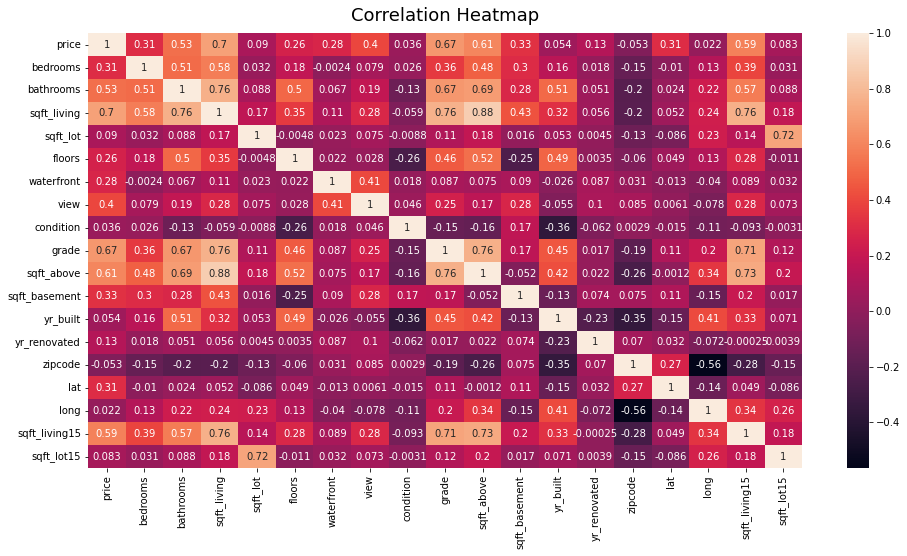

In [12]:
plt.figure(figsize=(16, 8))
heatmap = sb.heatmap(corr_matrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [13]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
sqft_basement    0.325008
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

Based on the data sqft_living, grade, sqft_above highly affect the housing price.

# Prepare the data for Machine Learning algorithms.

#### Handling missing values


In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# selecting attributes with numeric values since median is for numerical values only
housing_num = df.select_dtypes(include=[np.number])

# fit the imputer instance to the training data
imputer.fit(housing_num)

#or using doing it manually
df[['waterfront','view','sqft_basement','yr_renovated']] = df[['waterfront','view','sqft_basement','yr_renovated']].fillna(df[['waterfront','view','sqft_basement','yr_renovated']].median())

### Feature Scaling and Transformation

In [15]:
from sklearn.preprocessing import StandardScaler

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
x = df[features]
y = df['price']
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)


### split train and test set

In [16]:
from sklearn.model_selection import train_test_split

# 80% train set and 20% test set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Select Model
## 1. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
# prediction
y_pred = lin_reg.predict(x_test)

In [19]:
# Calculate the performance metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(lr_mse,2))
print('R-squared:', round(lr_r2,4))

Mean Squared Error: 34542733740.58
R-squared: 0.7066


The linear regression model explains 70.66% of the data

## 2. Ridge Regression:

In [20]:
from sklearn.linear_model import Ridge

# Create and fit the model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)

Ridge()

The alpha parameter controls the strength of the regularization (higher values of alpha lead to stronger regularization)

In [21]:
# prediction
y_pred1 = ridge_reg.predict(x_test)

In [22]:
# Calculate the performance metrics
rg_mse = mean_squared_error(y_test, y_pred)
rg_r2 = r2_score(y_test, y_pred1)

# Print the performance metrics
print('Mean Squared Error:', round(rg_mse,2))
print('R-squared:', round(rg_r2,4))

Mean Squared Error: 34542733740.58
R-squared: 0.7066


The Ridge regression explains the same percentage as Linear regression (70.66%) but with slightly small Mean Squared Error

## 3. Support Vector Regression (SVR): 

In [23]:
from sklearn.svm import SVR

# Create and fit the model
svr = SVR(kernel='rbf', C=1e5, gamma=0.1)
svr.fit(x_train, y_train)

# prediction 
y_pred = svr.predict(x_test)

# Print the score


We specify the kernel to be a radial basis function ('rbf') and set the values of the C and gamma hyperparameters.

In [24]:
# Calculate the performance metrics
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(svr_mse,2))
print('R-squared:', round(svr_r2))

Mean Squared Error: 32284903344.43
R-squared: 1


In [25]:
# Grid Search cross validation for choosing the hyper parameter 'C'
'''from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(SVR(kernel='rbf', gamma='auto'), param_grid, cv=5)
grid.fit(x_train, y_train)
print('Best C:', grid.best_params_['C'])'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {'C': [0.1, 1, 10, 100]}\ngrid = GridSearchCV(SVR(kernel='rbf', gamma='auto'), param_grid, cv=5)\ngrid.fit(x_train, y_train)\nprint('Best C:', grid.best_params_['C'])"

In [26]:
# Perform k-fold cross-validation with different values of C and evaluate the performance of the model. 
#Choose the value of C that gives the best average performance across all folds.
'''from sklearn.model_selection import cross_val_score

C_values = [0.1, 1, 10, 100]
scores = []
for C in C_values:
    model = SVR(kernel='rbf', C=C, gamma='auto')
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    scores.append(cv_scores.mean())
    
best_C = C_values[np.argmax(scores)]
print('Best C:', best_C)'''

"from sklearn.model_selection import cross_val_score\n\nC_values = [0.1, 1, 10, 100]\nscores = []\nfor C in C_values:\n    model = SVR(kernel='rbf', C=C, gamma='auto')\n    cv_scores = cross_val_score(model, x_train, y_train, cv=5)\n    scores.append(cv_scores.mean())\n    \nbest_C = C_values[np.argmax(scores)]\nprint('Best C:', best_C)"

## 4. Decision Tree Regression

In [27]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regression model
dtr = DecisionTreeRegressor()

# Fit the model on the training data
dtr.fit(x_train, y_train)

# Predict the target variable for the testing data
y_pred = dtr.predict(x_test)

# Evaluate the model performance using mean squared error metric
# Calculate the performance metrics
dtr_mse = mean_squared_error(y_test, y_pred)
dtr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(dtr_mse,2))
print('R-squared:', round(dtr_r2))

Mean Squared Error: 30931256969.65
R-squared: 1


## 5. Random Forest Regression

In [28]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict the target variable for the testing data
y_pred = rf.predict(x_test)

# Evaluate the model performance using mean squared error metric
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(rf_mse,2))
print('R-squared:', round(rf_r2))

Mean Squared Error: 13324264372.96
R-squared: 1


## 6. LASSO Regression

In [29]:
# Import the necessary libraries
from sklearn.linear_model import Lasso

# Create a LASSO Regression model
lasso = Lasso(alpha=0.01, max_iter=10000)

# Fit the model on the training data
lasso.fit(x_train, y_train)

# Predict the target variable for the testing data
y_pred = lasso.predict(x_test)

# Evaluate the model performance using mean squared error metric
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(lasso_mse,2))
print('R-squared:', round(lasso_r2))


Mean Squared Error: 34542734022.99
R-squared: 1


Linear Regression and Ridge Regression explains 70.66% of the data.

Support Vector Regression(SVR), Decision Tree Regression(DTR),  Random Forest Regression (RFR) and LASSO Regression explains 100% of the data with different Mean Squared Error.

Comparing the MSE of the for candidates models we hace;

In [30]:
import pandas as pd

# Create a dictionary with data
data = {'Algorithm': ['SVR', 'DTR', 'RFR', 'LASSO'],
        'MSE': [svr_mse, dtr_mse, rf_mse, lasso_mse]}

# Create a DataFrame from the dictionary
df_mse = pd.DataFrame(data)
df_mse


,Algorithm,MSE
0,SVR,3.228490e+10
1,DTR,3.093126e+10
2,RFR,1.332426e+10
3,LASSO,3.454273e+10


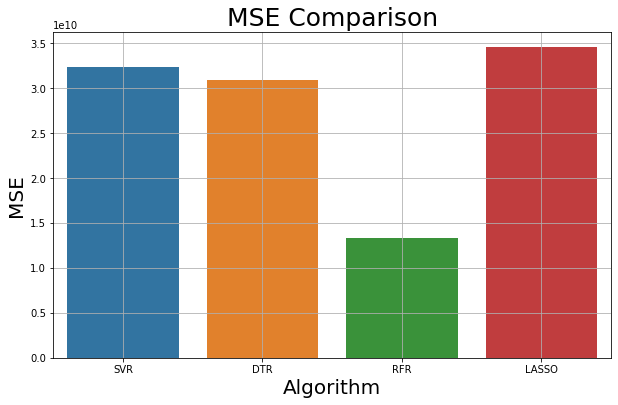

In [31]:
plt.figure(figsize=(10,6))
sb.barplot(x='Algorithm',y='MSE', data=df_mse)
plt.title("MSE Comparison", fontsize=25)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("MSE",fontsize=20)
plt.grid()
plt.show()

Random Forest Regression is the best out of the 4 models since it has the least mean squared error(MSE). 

Therefore, We can deploy Random Forest Regression model in production to predict housing price. 

# Feature Selection

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import make_regression

# Generate sample data
x, y = make_regression(n_samples=100, n_features=19, n_informative=5, random_state=42)

# Select the top 5 features using f_regression as the scoring function
selector = SelectKBest(f_regression, k=5)
x_new = selector.fit_transform(x, y)

# Train a linear regression model using the selected features
#model = LinearRegression()
#model.fit(x_new, y)
#x_new.head()

In [38]:
# selecting top 5 features manually
new_features = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms','bedrooms']
x_new = df[new_features]
y = df['price']      

# 80% train set and 20% test set
x_train,x_test,y_train,y_test = train_test_split(x_new,y, test_size=0.2, random_state=0)

In [39]:
# Create a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict the target variable for the testing data
y_pred = rf.predict(x_test)

# Evaluate the model performance using mean squared error metric
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', round(rf_mse,2))
print('R-squared:', round(rf_r2))

Mean Squared Error: 50675588523.44
R-squared: 1


In [41]:
x_new.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,bedrooms
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,2080.321850,7.657915,1788.596842,1986.620318,2.115826,3.373200
std,918.106125,1.173200,827.759761,685.230472,0.768984,0.926299
min,370.000000,3.000000,370.000000,399.000000,0.500000,1.000000
25%,1430.000000,7.000000,1190.000000,1490.000000,1.750000,3.000000
50%,1910.000000,7.000000,1560.000000,1840.000000,2.250000,3.000000
75%,2550.000000,8.000000,2210.000000,2360.000000,2.500000,4.000000
max,13540.000000,13.000000,9410.000000,6210.000000,8.000000,33.000000


In [47]:
# new input
x_input = {'sqft_living':[370,1430],
          'grade':[3,7],
          'sqft_above':[370,1190],
          'sqft_living15':[399,1490],
          'bathrooms':[1,2],
          'bedrooms':[1,3]}
new_obs =pd.DataFrame(x_input)
price_pred = rf.predict(new_obs)
np.round(price_pred,2)

array([231866.5 , 383718.48])

## Save Regression model

In [49]:
import joblib

#  save ML model
joblib.dump(rf, 'rf_model.joblib')


['rf_model.joblib']

### Required Inputs
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartment interior living space
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
